In [372]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
#random.seed(4)
#according to fillrate calc other transport qty

In [373]:
# Problem paramters
I=4
J=4
K=4
L=4
M=4
N=4
P=4
R=4
S=4
nvar=5
nobj=2
varmax=15000
varmin=100
#check

In [374]:
a=np.random.randint(100,150,size=5)
a

array([117, 134, 148, 128, 134])

In [375]:
#parameters
pci=np.random.randint(100,150,size=I)
#fixed cost
fcj=np.random.randint(10000,150000,size=J)
fck=np.random.randint(5000,10000,size=K)
fcl=np.random.randint(5000,10000,size=L)
fcm=np.random.randint(5000,10000,size=M)
fcn=np.random.randint(5000,10000,size=N)
fcp=np.random.randint(5000,10000,size=P)
fcr=np.random.randint(5000,10000,size=R)
fcs=np.random.randint(5000,10000,size=S)
#fill rate assumption
fill_j=1
fill_k=0.99
fill_l=0.95
#variable cost (manufacturing cost)
mcj=np.random.randint(10,150,size=J)
#Inventory cost
invj=np.random.randint(10,15,size=J)
invk=np.random.randint(15,25,size=K)
invl=np.random.randint(20,50,size=L)
invm=np.random.randint(20,50,size=M)
invn=np.random.randint(20,50,size=N)
invp=np.random.randint(20,50,size=P)
invr=np.random.randint(15,25,size=R)
invs=np.random.randint(10,15,size=S)
#Transportation cost
tcij=np.random.randint(10,15,size=(I,J))
tcjk=np.random.randint(10,15,size=(J,K))
tckl=np.random.randint(10,15,size=(K,L))
tclm=np.random.randint(10,15,size=(L,M))
tcmn=np.random.randint(10,15,size=(M,N))
tcmp=np.random.randint(10,15,size=(M,P))
tcmr=np.random.randint(10,15,size=(M,R))
tcms=np.random.randint(10,15,size=(M,S))
tcns=np.random.randint(10,15,size=(N,S))
tcps=np.random.randint(10,15,size=(P,S))
tcrs=np.random.randint(10,15,size=(R,S))
tcri=np.random.randint(10,15,size=(R,I))
tcpj=np.random.randint(10,15,size=(P,J))
tcnk=np.random.randint(10,15,size=(N,K))
#Time present in the inventory
invtj=np.random.randint(10,15,size=J)
invtk=np.random.randint(15,25,size=K)
invtl=np.random.randint(20,50,size=L)
invtm=np.random.randint(20,50,size=M)
invtn=np.random.randint(20,50,size=N)
invtp=np.random.randint(20,50,size=P)
invtr=np.random.randint(15,25,size=R)
invts=np.random.randint(10,15,size=S)
#Fixed job oppurtunities
fjj=np.random.randint(500,1000,size=J)
fjk=np.random.randint(100,150,size=K)
fjl=np.random.randint(100,150,size=L)
fjm=np.random.randint(100,150,size=M)
fjn=np.random.randint(100,150,size=N)
fjp=np.random.randint(100,150,size=P)
fjr=np.random.randint(100,150,size=R)
fjs=np.random.randint(100,150,size=S)
#Variable job oppurtunities
vjj=np.random.randint(50,100,size=J)
vjk=np.random.randint(10,15,size=K)
vjl=np.random.randint(10,15,size=L)
vjm=np.random.randint(10,15,size=M)
vjn=np.random.randint(10,15,size=N)
vjp=np.random.randint(10,15,size=P)
vjr=np.random.randint(10,15,size=R)
vjs=np.random.randint(10,15,size=S)
#Capacity
pj=np.random.randint(15,25,size=J)
pk=np.random.randint(50,100,size=K)
pl=np.random.randint(50,100,size=L)
pm=np.random.randint(50,100,size=M)
pn=np.random.randint(50,100,size=N)
pp=np.random.randint(50,100,size=P)
pr=np.random.randint(50,100,size=R)
ps=np.random.randint(50,100,size=S)
#Distance between facilities
dij=np.random.randint(1000,1500,size=(I,J))
djk=np.random.randint(100,150,size=(J,K))
dkl=np.random.randint(70,120,size=(K,L))
dlm=np.random.randint(50,75,size=(L,M))
dmn=np.random.randint(50,75,size=(M,N))
dmp=np.random.randint(100,150,size=(M,P))
dmr=np.random.randint(100,150,size=(M,R))
dms=np.random.randint(100,150,size=(M,S))
dns=np.random.randint(100,150,size=(N,S))
dps=np.random.randint(100,150,size=(P,S))
drs=np.random.randint(100,150,size=(R,S))
dri=np.random.randint(100,150,size=(R,I))
dpj=np.random.randint(100,150,size=(P,J))
dnk=np.random.randint(100,150,size=(N,K))

In [376]:
#Hyper paramters
#alpha
al=0.1
#betta
bn=0.3
bp=0.3
br=0.15
bs=0.15
#Gamma
gn=0.9
gp=0.9
gr=0.9
#Monetary gain
scd=0.5
scm=0.4
scr=0.35
scu=0.15
#Product weight
pw=0.450/1000
#Social cost of carbon
co2e=73.45
scc=86
#Maximum desired facilities
maxi=2
maxj=2
maxk=3
maxl=4
maxm=3
maxn=2
maxp=2
maxr=1
maxs=1

In [377]:
#Cost function1
def calc_objective1(lst_pq):
    p_q=round(np.average(lst_pq))
    Yi=np.ones(maxi,dtype=np.int16)
    Yj=np.ones(maxj,dtype=np.int16)
    Yk=np.ones(maxk,dtype=np.int16)
    Yl=np.ones(maxl,dtype=np.int16)
    Ym=np.ones(maxm,dtype=np.int16)
    Yn=np.ones(maxn,dtype=np.int16)
    Yp=np.ones(maxp,dtype=np.int16)
    Yr=np.ones(maxr,dtype=np.int16)
    Ys=np.ones(maxs,dtype=np.int16)
    #cost paramters calc
    zfc=0
    for i in range(maxi):
        zfc+=fcj[i]*Yi[i]
    for j in range(maxj):
        zfc+=fcj[j]*Yj[j]
    for k in range(maxk):
        zfc+=fcn[k]*Yk[k]
    for l in range(maxl):
        zfc+=fcn[l]*Yl[l]
    for m in range(maxm):
        zfc+=fcn[m]*Ym[m]
    for n in range(maxn):
        zfc+=fcn[n]*Yn[n]
    for p in range(maxp):
        zfc+=fcp[p]*Yp[p]
    for r in range(maxr):
        zfc+=fcr[r]*Yr[r]
    for s in range(maxs):
        zfc+=fcs[s]*Ys[s]
    #purchasing cost
    zpc=0
    for i in range(maxi):
        zpc+=pci[i]*Yi[i]*p_q
    #mfg cost
    zmc=0
    for i in range(maxj):
        zmc+=mcj[i]*Yj[i]*p_q
    #inv
    zinv=0
    for i in range(maxj):
        zinv+=invj[i]*invtj[i]*Yj[i]*p_q*fill_j
    for i in range(maxk):
        zinv+=invk[i]*invtk[i]*Yk[i]*p_q*fill_k
    for i in range(maxl):
        zinv+=invl[i]*invtl[i]*Yl[i]*p_q*fill_l
    for i in range(maxm):
        zinv+=invm[i]*invtm[i]*Ym[i]*p_q*al
    for i in range(maxn):
        zinv+=invn[i]*invtn[i]*Yn[i]*p_q*al*bn
    for i in range(maxp):
        zinv+=invp[i]*invtp[i]*Yp[i]*p_q*al*bp
    for i in range(maxr):
        zinv+=invr[i]*invtr[i]*Yr[i]*p_q*al*br
    for i in range(maxs):
        zinv+=invs[i]*invts[i]*Ys[i]*p_q*al*bs*(3-(gn+gp+gr))
    #tc
    ztc=0
    for temp1 in range(maxi):
        for temp2 in range(maxj):
            ztc+=tcij[temp1][temp2]*dij[temp1][temp2]*p_q*Yi[temp1]*Yj[temp2]*fill_j
    for temp1 in range(maxj):
        for temp2 in range(maxk):
            ztc+=tcjk[temp1][temp2]*djk[temp1][temp2]*p_q*Yj[temp1]*Yk[temp2]*fill_k
    for temp1 in range(maxk):
        for temp2 in range(maxl):
            ztc+=tckl[temp1][temp2]*dkl[temp1][temp2]*p_q*Yk[temp1]*Yl[temp2]*fill_l
    for temp1 in range(maxl):
        for temp2 in range(maxm):
            ztc+=tclm[temp1][temp2]*dlm[temp1][temp2]*p_q*Yl[temp1]*Ym[temp2]*al
    for temp1 in range(maxm):
        for temp2 in range(maxn):
            ztc+=tcmn[temp1][temp2]*dmn[temp1][temp2]*p_q*Ym[temp1]*Yn[temp2]*al*bn
    for temp1 in range(maxm):
        for temp2 in range(maxp):
            ztc+=tcmp[temp1][temp2]*dmp[temp1][temp2]*p_q*Ym[temp1]*Yp[temp2]*al*bp
    for temp1 in range(maxm):
        for temp2 in range(maxr):
            ztc+=tcmr[temp1][temp2]*dmr[temp1][temp2]*p_q*Ym[temp1]*Yr[temp2]*al*br
    for temp1 in range(maxm):
        for temp2 in range(maxs):
            ztc+=tcms[temp1][temp2]*dms[temp1][temp2]*p_q*Ym[temp1]*Ys[temp2]*al*bs
    for temp1 in range(maxr):
        for temp2 in range(maxs):
            ztc+=tcrs[temp1][temp2]*drs[temp1][temp2]*p_q*Yr[temp1]*Ys[temp2]*al*(1-gr)*br
    for temp1 in range(maxp):
        for temp2 in range(maxs):
            ztc+=tcps[temp1][temp2]*dps[temp1][temp2]*p_q*Yp[temp1]*Ys[temp2]*al*(1-gp)*bp
    for temp1 in range(maxn):
        for temp2 in range(maxs):
            ztc+=tcns[temp1][temp2]*dns[temp1][temp2]*p_q*Yn[temp1]*Ys[temp2]*al*(1-gn)*bn
    for temp1 in range(maxn):
        for temp2 in range(maxk):
            ztc+=tcns[temp1][temp2]*dnk[temp1][temp2]*p_q*Yn[temp1]*Yk[temp2]*al*gn*bn
    for temp1 in range(maxp):
        for temp2 in range(maxj):
            ztc+=tcpj[temp1][temp2]*dpj[temp1][temp2]*p_q*Yp[temp1]*Yj[temp2]*al*gp*bp
    for temp1 in range(maxr):
        for temp2 in range(maxi):
            ztc+=tcri[temp1][temp2]*dri[temp1][temp2]*p_q*Yr[temp1]*Yi[temp2]*al*gr*br
    #Monetry savings due to reselling
    zscd=0
    for i in range(maxn):
        for j in range(maxk):
            zscd+=scd*(gn*p_q*al*bn*Yn[i]*Yk[j])
    zscm=0
    for i in range(maxp):
        for j in range(maxj):
            zscm+=scm*(gp*p_q*al*bp*Yp[i]*Yj[j])
    zscr=0
    for i in range(maxr):
        for j in range(maxi):
            zscr+=scr*(gr*p_q*al*br*Yr[i]*Yi[j])
    #Co2 emission
    zco2ec=0
    for temp1 in range(maxi):
        for temp2 in range(maxj):
            zco2ec+=co2e*scc*dij[temp1][temp2]*pw*p_q*Yi[temp1]*Yj[temp2]*fill_j
    for temp1 in range(maxj):
        for temp2 in range(maxk):
            zco2ec+=co2e*scc*djk[temp1][temp2]*pw*p_q*Yj[temp1]*Yk[temp2]*fill_k
    for temp1 in range(maxk):
        for temp2 in range(maxl):
            zco2ec+=co2e*scc*dkl[temp1][temp2]*pw*p_q*Yk[temp1]*Yl[temp2]*fill_l
    for temp1 in range(maxl):
        for temp2 in range(maxm):
            zco2ec+=co2e*scc*dlm[temp1][temp2]*pw*p_q*Yl[temp1]*Ym[temp2]*al
    for temp1 in range(maxm):
        for temp2 in range(maxn):
            zco2ec+=co2e*scc*dmn[temp1][temp2]*pw*p_q*Ym[temp1]*Yn[temp2]*al*bn
    for temp1 in range(maxm):
        for temp2 in range(maxp):
            zco2ec+=co2e*scc*dmp[temp1][temp2]*pw*p_q*Ym[temp1]*Yp[temp2]*al*bp
    for temp1 in range(maxm):
        for temp2 in range(maxr):
            zco2ec+=co2e*scc*dmr[temp1][temp2]*pw*p_q*Ym[temp1]*Yr[temp2]*al*br
    for temp1 in range(maxm):
        for temp2 in range(maxs):
            zco2ec+=co2e*scc*dms[temp1][temp2]*pw*p_q*Ym[temp1]*Ys[temp2]*al*bs
    for temp1 in range(maxr):
        for temp2 in range(maxs):
            zco2ec+=co2e*scc*drs[temp1][temp2]*pw*p_q*Yr[temp1]*Ys[temp2]*al*(1-gr)*br
    for temp1 in range(maxp):
        for temp2 in range(maxs):
            zco2ec+=co2e*scc*dps[temp1][temp2]*pw*p_q*Yp[temp1]*Ys[temp2]*al*(1-gp)*bp
    for temp1 in range(maxn):
        for temp2 in range(maxs):
            zco2ec+=co2e*scc*dns[temp1][temp2]*pw*p_q*Yn[temp1]*Ys[temp2]*al*(1-gn)*bn
    for temp1 in range(maxn):
        for temp2 in range(maxk):
            zco2ec+=co2e*scc*dnk[temp1][temp2]*pw*p_q*Yn[temp1]*Yk[temp2]*al*gn
    for temp1 in range(maxp):
        for temp2 in range(maxj):
            zco2ec+=co2e*scc*dpj[temp1][temp2]*pw*p_q*Yp[temp1]*Yj[temp2]*al*gp
    for temp1 in range(maxr):
        for temp2 in range(maxi):
            zco2ec+=co2e*scc*dri[temp1][temp2]*pw*p_q*Yr[temp1]*Yi[temp2]*al*gr
    #selling waste
    zsw=scu*p_q*al*bs*(3-(gn+gp+gr))
    #Social paramters
    zfj=0
    for i in range(maxi):
        zfj+=fjj[i]*Yi[i]
    for j in range(maxj):
        zfj+=fjj[j]*Yj[j]
    for k in range(maxk):
        zfj+=fjn[k]*Yk[k]
    for l in range(maxl):
        zfj+=fjn[l]*Yl[l]
    for m in range(maxm):
        zfj+=fjn[m]*Ym[m]
    for n in range(maxn):
        zfj+=fjn[n]*Yn[n]
    for p in range(maxp):
        zfj+=fjp[p]*Yp[p]
    for r in range(maxr):
        zfj+=fjr[r]*Yr[r]
    for s in range(maxs):
        zfj+=fjs[s]*Ys[s]
    zvj=0
    for j in range(maxj):
        zvj+=vjj[j]*p_q*fill_j/pj[j]
    for k in range(maxk):
        zvj+=vjn[k]*p_q*fill_k/pk[k]
    for l in range(maxl):
        zvj+=vjn[l]*p_q*fill_l/pl[l]
    for m in range(maxm):
        zvj+=vjn[m]*p_q*al/pm[m]
    for n in range(maxn):
        zvj+=vjn[n]*p_q*al*bn/pn[n]
    for p in range(maxp):
        zvj+=vjp[p]*p_q*al*bp/pp[p]
    for r in range(maxr):
        zvj+=vjr[r]*p_q*al*br/pr[r]
    for s in range(maxs):
        zvj+=vjs[s]*p_q*al*bs*(3-(gn+gp+gr))/ps[s]
    z1=zfc+zpc+zmc+zinv+ztc-zscd-zscm-zscr+zco2ec-zsw
    z2=zfj+zvj
    return z1

In [378]:
#Cost function2
def calc_objective2(lst_pq):
    p_q=round(np.average(lst_pq))
    Yi=np.ones(maxi,dtype=np.int16)
    Yj=np.ones(maxj,dtype=np.int16)
    Yk=np.ones(maxk,dtype=np.int16)
    Yl=np.ones(maxl,dtype=np.int16)
    Ym=np.ones(maxm,dtype=np.int16)
    Yn=np.ones(maxn,dtype=np.int16)
    Yp=np.ones(maxp,dtype=np.int16)
    Yr=np.ones(maxr,dtype=np.int16)
    Ys=np.ones(maxs,dtype=np.int16)
    #cost paramters calc
    zfc=0
    for i in range(maxi):
        zfc+=fcj[i]*Yi[i]
    for j in range(maxj):
        zfc+=fcj[j]*Yj[j]
    for k in range(maxk):
        zfc+=fcn[k]*Yk[k]
    for l in range(maxl):
        zfc+=fcn[l]*Yl[l]
    for m in range(maxm):
        zfc+=fcn[m]*Ym[m]
    for n in range(maxn):
        zfc+=fcn[n]*Yn[n]
    for p in range(maxp):
        zfc+=fcp[p]*Yp[p]
    for r in range(maxr):
        zfc+=fcr[r]*Yr[r]
    for s in range(maxs):
        zfc+=fcs[s]*Ys[s]
    #purchasing cost
    zpc=0
    for i in range(maxi):
        zpc+=pci[i]*Yi[i]*p_q
    #mfg cost
    zmc=0
    for i in range(maxj):
        zmc+=mcj[i]*Yj[i]*p_q
    #inv
    zinv=0
    for i in range(maxj):
        zinv+=invj[i]*invtj[i]*Yj[i]*p_q*fill_j
    for i in range(maxk):
        zinv+=invk[i]*invtk[i]*Yk[i]*p_q*fill_k
    for i in range(maxl):
        zinv+=invl[i]*invtl[i]*Yl[i]*p_q*fill_l
    for i in range(maxm):
        zinv+=invm[i]*invtm[i]*Ym[i]*p_q*al
    for i in range(maxn):
        zinv+=invn[i]*invtn[i]*Yn[i]*p_q*al*bn
    for i in range(maxp):
        zinv+=invp[i]*invtp[i]*Yp[i]*p_q*al*bp
    for i in range(maxr):
        zinv+=invr[i]*invtr[i]*Yr[i]*p_q*al*br
    for i in range(maxs):
        zinv+=invs[i]*invts[i]*Ys[i]*p_q*al*bs*(3-(gn+gp+gr))
    #tc
    ztc=0
    for temp1 in range(maxi):
        for temp2 in range(maxj):
            ztc+=tcij[temp1][temp2]*dij[temp1][temp2]*p_q*Yi[temp1]*Yj[temp2]*fill_j
    for temp1 in range(maxj):
        for temp2 in range(maxk):
            ztc+=tcjk[temp1][temp2]*djk[temp1][temp2]*p_q*Yj[temp1]*Yk[temp2]*fill_k
    for temp1 in range(maxk):
        for temp2 in range(maxl):
            ztc+=tckl[temp1][temp2]*dkl[temp1][temp2]*p_q*Yk[temp1]*Yl[temp2]*fill_l
    for temp1 in range(maxl):
        for temp2 in range(maxm):
            ztc+=tclm[temp1][temp2]*dlm[temp1][temp2]*p_q*Yl[temp1]*Ym[temp2]*al
    for temp1 in range(maxm):
        for temp2 in range(maxn):
            ztc+=tcmn[temp1][temp2]*dmn[temp1][temp2]*p_q*Ym[temp1]*Yn[temp2]*al*bn
    for temp1 in range(maxm):
        for temp2 in range(maxp):
            ztc+=tcmp[temp1][temp2]*dmp[temp1][temp2]*p_q*Ym[temp1]*Yp[temp2]*al*bp
    for temp1 in range(maxm):
        for temp2 in range(maxr):
            ztc+=tcmr[temp1][temp2]*dmr[temp1][temp2]*p_q*Ym[temp1]*Yr[temp2]*al*br
    for temp1 in range(maxm):
        for temp2 in range(maxs):
            ztc+=tcms[temp1][temp2]*dms[temp1][temp2]*p_q*Ym[temp1]*Ys[temp2]*al*bs
    for temp1 in range(maxr):
        for temp2 in range(maxs):
            ztc+=tcrs[temp1][temp2]*drs[temp1][temp2]*p_q*Yr[temp1]*Ys[temp2]*al*(1-gr)*br
    for temp1 in range(maxp):
        for temp2 in range(maxs):
            ztc+=tcps[temp1][temp2]*dps[temp1][temp2]*p_q*Yp[temp1]*Ys[temp2]*al*(1-gp)*bp
    for temp1 in range(maxn):
        for temp2 in range(maxs):
            ztc+=tcns[temp1][temp2]*dns[temp1][temp2]*p_q*Yn[temp1]*Ys[temp2]*al*(1-gn)*bn
    for temp1 in range(maxn):
        for temp2 in range(maxk):
            ztc+=tcns[temp1][temp2]*dnk[temp1][temp2]*p_q*Yn[temp1]*Yk[temp2]*al*gn*bn
    for temp1 in range(maxp):
        for temp2 in range(maxj):
            ztc+=tcpj[temp1][temp2]*dpj[temp1][temp2]*p_q*Yp[temp1]*Yj[temp2]*al*gp*bp
    for temp1 in range(maxr):
        for temp2 in range(maxi):
            ztc+=tcri[temp1][temp2]*dri[temp1][temp2]*p_q*Yr[temp1]*Yi[temp2]*al*gr*br
    #Monetry savings due to reselling
    zscd=0
    for i in range(maxn):
        for j in range(maxk):
            zscd+=scd*(gn*p_q*al*bn*Yn[i]*Yk[j])
    zscm=0
    for i in range(maxp):
        for j in range(maxj):
            zscm+=scm*(gp*p_q*al*bp*Yp[i]*Yj[j])
    zscr=0
    for i in range(maxr):
        for j in range(maxi):
            zscr+=scr*(gr*p_q*al*br*Yr[i]*Yi[j])
    #Co2 emission
    zco2ec=0
    for temp1 in range(maxi):
        for temp2 in range(maxj):
            zco2ec+=co2e*scc*dij[temp1][temp2]*pw*p_q*Yi[temp1]*Yj[temp2]*fill_j
    for temp1 in range(maxj):
        for temp2 in range(maxk):
            zco2ec+=co2e*scc*djk[temp1][temp2]*pw*p_q*Yj[temp1]*Yk[temp2]*fill_k
    for temp1 in range(maxk):
        for temp2 in range(maxl):
            zco2ec+=co2e*scc*dkl[temp1][temp2]*pw*p_q*Yk[temp1]*Yl[temp2]*fill_l
    for temp1 in range(maxl):
        for temp2 in range(maxm):
            zco2ec+=co2e*scc*dlm[temp1][temp2]*pw*p_q*Yl[temp1]*Ym[temp2]*al
    for temp1 in range(maxm):
        for temp2 in range(maxn):
            zco2ec+=co2e*scc*dmn[temp1][temp2]*pw*p_q*Ym[temp1]*Yn[temp2]*al*bn
    for temp1 in range(maxm):
        for temp2 in range(maxp):
            zco2ec+=co2e*scc*dmp[temp1][temp2]*pw*p_q*Ym[temp1]*Yp[temp2]*al*bp
    for temp1 in range(maxm):
        for temp2 in range(maxr):
            zco2ec+=co2e*scc*dmr[temp1][temp2]*pw*p_q*Ym[temp1]*Yr[temp2]*al*br
    for temp1 in range(maxm):
        for temp2 in range(maxs):
            zco2ec+=co2e*scc*dms[temp1][temp2]*pw*p_q*Ym[temp1]*Ys[temp2]*al*bs
    for temp1 in range(maxr):
        for temp2 in range(maxs):
            zco2ec+=co2e*scc*drs[temp1][temp2]*pw*p_q*Yr[temp1]*Ys[temp2]*al*(1-gr)*br
    for temp1 in range(maxp):
        for temp2 in range(maxs):
            zco2ec+=co2e*scc*dps[temp1][temp2]*pw*p_q*Yp[temp1]*Ys[temp2]*al*(1-gp)*bp
    for temp1 in range(maxn):
        for temp2 in range(maxs):
            zco2ec+=co2e*scc*dns[temp1][temp2]*pw*p_q*Yn[temp1]*Ys[temp2]*al*(1-gn)*bn
    for temp1 in range(maxn):
        for temp2 in range(maxk):
            zco2ec+=co2e*scc*dnk[temp1][temp2]*pw*p_q*Yn[temp1]*Yk[temp2]*al*gn
    for temp1 in range(maxp):
        for temp2 in range(maxj):
            zco2ec+=co2e*scc*dpj[temp1][temp2]*pw*p_q*Yp[temp1]*Yj[temp2]*al*gp
    for temp1 in range(maxr):
        for temp2 in range(maxi):
            zco2ec+=co2e*scc*dri[temp1][temp2]*pw*p_q*Yr[temp1]*Yi[temp2]*al*gr
    #selling waste
    zsw=scu*p_q*al*bs*(3-(gn+gp+gr))
    #Social paramters
    zfj=0
    for i in range(maxi):
        zfj+=fjj[i]*Yi[i]
    for j in range(maxj):
        zfj+=fjj[j]*Yj[j]
    for k in range(maxk):
        zfj+=fjn[k]*Yk[k]
    for l in range(maxl):
        zfj+=fjn[l]*Yl[l]
    for m in range(maxm):
        zfj+=fjn[m]*Ym[m]
    for n in range(maxn):
        zfj+=fjn[n]*Yn[n]
    for p in range(maxp):
        zfj+=fjp[p]*Yp[p]
    for r in range(maxr):
        zfj+=fjr[r]*Yr[r]
    for s in range(maxs):
        zfj+=fjs[s]*Ys[s]
    zvj=0
    for j in range(maxj):
        zvj+=vjj[j]*p_q*fill_j/pj[j]
    for k in range(maxk):
        zvj+=vjn[k]*p_q*fill_k/pk[k]
    for l in range(maxl):
        zvj+=vjn[l]*p_q*fill_l/pl[l]
    for m in range(maxm):
        zvj+=vjn[m]*p_q*al/pm[m]
    for n in range(maxn):
        zvj+=vjn[n]*p_q*al*bn/pn[n]
    for p in range(maxp):
        zvj+=vjp[p]*p_q*al*bp/pp[p]
    for r in range(maxr):
        zvj+=vjr[r]*p_q*al*br/pr[r]
    for s in range(maxs):
        zvj+=vjs[s]*p_q*al*bs*(3-(gn+gp+gr))/ps[s]
    z1=zfc+zpc+zmc+zinv+ztc-zscd-zscm-zscr+zco2ec-zsw
    z2=zfj+zvj
    return -z2

In [379]:
# #Non dominated sorting
# def NonDominatedSorting(pop):
#     npop=len(pop)
#     for i in range(npop):
#         dominatedset=[]
#         dominatedcount=0
#     for i in range(npop):
#         for j in range(i,npop):
#             p=pop(i)
#             q=pop(j)
#             if 



In [380]:
# SEO Paramters
maxit=1500
alpha=0.9
betta=0.5
num_c=50

In [381]:
# Initialization
persons={'Position':[],'Cost1':[],'Cost2': []}
'''{'Position': [], 'Cost1': [],'Cost2': [], 'Rank': [], 'DominationSet': [], 'DominatedCount': [], 'CrowdingDistance': []}'''

"{'Position': [], 'Cost1': [],'Cost2': [], 'Rank': [], 'DominationSet': [], 'DominatedCount': [], 'CrowdingDistance': []}"

In [382]:
for i in range(2):
    a=[]
    for i in range(nvar):
        a.append(round(random.uniform(varmin,varmax)))
    ##persons['Cost'].append(calc_objective(temp))
    persons['Position'].append(a)
    persons['Cost1'].append(calc_objective1(a))
    persons['Cost2'].append(calc_objective2(a))
persons_df=pd.DataFrame(persons)
print(persons_df)

                           Position         Cost1         Cost2
0  [12727, 11480, 3901, 7482, 6797]  8.148976e+08 -78458.695618
1   [9809, 11852, 1499, 522, 12553]  6.967431e+08 -67752.646826


In [383]:
gamma=round(nvar*alpha)
#tetta=np.zeros((nobj,gamma),dtype=np.int32)
#sigma=0.1*varmax
# bestsol_index=attacker_index
# bestcost1=np.zeros((maxit,1),dtype=np.int64)
# bestcost2=np.zeros((maxit,1),dtype=np.int64)
# paretocost=np.zeros((maxit,1),dtype=np.int64)

In [384]:
#connect functions
def connect_1(a_index,d_index,betta,varmin,varmax):
    a=random.random()
    b=np.sin(betta)*a
    y=[]
    x1=persons_df.iloc[a_index,0]
    x2=persons_df.iloc[d_index,0]
    for i in range(len(x1)):
        c=x1[i]*((1-b)+((x1[i]+x2[i])/2)*b)
        #print(c)
        z=max(c,varmin)
        z=min(z,varmax)
        y.append(z)
    return y
def connect_2(a_index,d_index,betta,varmin,varmax):
    a=random.random()
    b=np.sin(betta)*a
    bb=np.cos(betta)*a
    x1=persons_df.iloc[a_index,0]
    x2=persons_df.iloc[d_index,0]
    y1=[]
    y2=[]
    for i in range(len(x1)):
        c=x1[i]*((1-b)+((x1[i]+x2[i])/2)*b)
        cc=x2[i]*((1-bb)+((x1[i]+x2[i])/2)*bb)
        #print(c)
        z=max(c,varmin)
        z=min(z,varmax)
        y1.append(z)
        z=max(cc,varmin)
        z=min(z,varmax)
        y2.append(z)
    return [y1,y2]
def connect_3(a_index,d_index,betta,varmin,varmax):
    a=random.random()
    b=np.sin(betta)*a
    bb=np.cos(betta)*a
    x1=persons_df.iloc[a_index,0]
    x2=persons_df.iloc[d_index,0]
    y=[]
    for i in range(len(x1)):
        c=x2[i]*((1-b)+((x1[i]*bb*(x1[i]+x2[i])/2))*b)
        #print(c)
        z=max(c,varmin)
        z=min(z,varmax)
        y.append(z)
    return y 
def connect_4(a_index,d_index,betta,varmin,varmax):
    a=random.random()
    b=np.sin(betta)*a
    bb=np.cos(betta)*a
    x1=persons_df.iloc[a_index,0]
    x2=persons_df.iloc[d_index,0]
    y=[]
    for i in range(len(x1)):
        c=x2[i]*bb*b+(((x2[i]*bb+x1[i])/2)*b)
        #print(c)
        z=max(c,varmin)
        z=min(z,varmax)
        y.append(z)
    return y

In [385]:
np.sin(0.2)

0.19866933079506122

In [386]:
# # attacker_index=[x for x in range(2) if persons_df['Cost1'].iloc[x]<=persons_df['Cost2'].iloc[x]]
for i in range(2):
    for j in range(2):
        if i==j:
            continue
        if persons_df.iloc[i,1]<=persons_df.iloc[j,1]:
            attacker_index=i
        else:
            attacker_index=j
if attacker_index==0:
    defender_index=1
else:
    defender_index=0
print(attacker_index,defender_index)

1 0


In [387]:
persons_df.iloc[attacker_index,0]

[9809, 11852, 1499, 522, 12553]

In [388]:
persons_df.iloc[defender_index,0]

[12727, 11480, 3901, 7482, 6797]

In [389]:
att_lst1=[]
def_lst1=[]
a=copy.deepcopy(persons_df.iloc[attacker_index,0])
att_lst1.append(a)
a=copy.deepcopy(persons_df.iloc[defender_index,0])
def_lst1.append(a)
print(att_lst1,def_lst1)

[[9809, 11852, 1499, 522, 12553]] [[12727, 11480, 3901, 7482, 6797]]


In [390]:
# SEO main loop
paretoposition=[]
paretocost1=[]
paretocost2=[]
sno=[]
att_lst=[]
def_lst=[]
for it in range(2,maxit+1):
    a=copy.deepcopy(persons_df.iloc[attacker_index,0])
    att_lst.append(a)
    a=copy.deepcopy(persons_df.iloc[defender_index,0])
    def_lst.append(a)
    new_defender=persons_df.iloc[defender_index,0]
    # print(new_defender)
    # print(persons_df.iloc[defender_index,0])
    for i in range(gamma):
        temp=np.random.randint(0,nvar)
        new_defender[temp]=persons_df.iloc[attacker_index,0][temp]
        #print(new_defender[temp])
        # curr_def_cost1=calc_objective1(curr_defender)
        # curr_def_cost2=calc_objective2(curr_defender)
        #Calc cost
    #     for j in range(nobj):
    #         tetta[j][i]= 
    #         #current ddefender cost - calc cost of trained defender
    #     tetta[0][i]+=tetta[1][i]
    # [value,index]=[max(tetta[0]),tetta[0].index(max(tetta[0]))]
    # print(new_defender)
    if  calc_objective1(new_defender)<=calc_objective1(persons_df.iloc[defender_index,0]) or calc_objective2(new_defender)<=calc_objective2(persons_df.iloc[defender_index,0]):
        #### persons_df.iloc[defender_index,0]=new_defender
        for xyz in range(nvar):
            persons_df.iloc[defender_index,0][xyz]=new_defender[xyz]
    # Spotting a attack
    for j in range(num_c):
        temp=random.randint(1,5)
        if temp==1:
            new_defender=connect_1(attacker_index,defender_index,betta,varmin,varmax)
        elif temp==2:
            [new_defender1,new_defender2]=connect_2(attacker_index,defender_index,betta,varmin,varmax)
            if  calc_objective1(new_defender1)<=calc_objective1(new_defender2) or calc_objective2(new_defender1)<=calc_objective2(new_defender2):
                new_defender=new_defender1
                #persons_df['Position'].iloc[defender_index]=
            #calculate cost of both new defenders then take best out of it
            else:
                new_defender=new_defender2
        elif temp==3:
            new_defender=connect_3(attacker_index,defender_index,betta,varmin,varmax)
        else:
            new_defender=connect_4(attacker_index,defender_index,betta,varmin,varmax)
    # Responding to  SE attack
    if calc_objective1(new_defender)<=calc_objective1(persons_df.iloc[defender_index,0]) or calc_objective2(new_defender) <= calc_objective2(persons_df.iloc[defender_index,0]):
        if calc_objective1(new_defender)<=calc_objective1(persons_df.iloc[attacker_index,0]) or calc_objective2(new_defender) <= calc_objective2(persons_df.iloc[attacker_index,0]):
            ### persons_df.iloc[attacker_index,0]=new_defender
            for xyz in range(nvar):
                persons_df.iloc[attacker_index,0][xyz]=new_defender[xyz]
        else:
            ### persons_df.iloc[defender_index,0]=new_defender
            for xyz in range(nvar):
                persons_df.iloc[defender_index,0][xyz]=new_defender[xyz]
    # elif <= or <=:
    #     ParetoCost(it)=new_defender #check can be combined with above
    elif calc_objective1(new_defender)>=calc_objective1(persons_df.iloc[defender_index,0]) or calc_objective2(new_defender) >= calc_objective2(persons_df.iloc[defender_index,0]):
        if calc_objective1(persons_df.iloc[defender_index,0])<=calc_objective1(persons_df.iloc[attacker_index,0]) or calc_objective2(persons_df.iloc[defender_index,0]) <= calc_objective2(persons_df.iloc[attacker_index,0]):
            ### persons_df.iloc[attacker_index,0]=persons_df.iloc[defender_index,0]
            for xyz in range(nvar):
                persons_df.iloc[attacker_index,0][xyz]=persons_df.iloc[defender_index,0][xyz]
    else:
        print("ERROR")
    
    att=copy.deepcopy(persons_df.iloc[attacker_index,0])
    paretoposition.append(att)
    paretocost=calc_objective1(persons_df.iloc[attacker_index,0])
    paretocost1.append(paretocost)
    paretocost=calc_objective2(persons_df.iloc[attacker_index,0])
    paretocost2.append(paretocost)
    print("Iteration no. ",it)
    sno.append(it)
    # new random defender
bestcost1=min(paretocost1)
bestcost2=min(paretocost2)
# print(bestcost1,bestcost2)

Iteration no.  2
Iteration no.  3
Iteration no.  4
Iteration no.  5
Iteration no.  6
Iteration no.  7
Iteration no.  8
Iteration no.  9
Iteration no.  10
Iteration no.  11
Iteration no.  12
Iteration no.  13
Iteration no.  14
Iteration no.  15
Iteration no.  16
Iteration no.  17
Iteration no.  18
Iteration no.  19
Iteration no.  20
Iteration no.  21
Iteration no.  22
Iteration no.  23
Iteration no.  24
Iteration no.  25
Iteration no.  26
Iteration no.  27
Iteration no.  28
Iteration no.  29
Iteration no.  30
Iteration no.  31
Iteration no.  32
Iteration no.  33
Iteration no.  34
Iteration no.  35
Iteration no.  36
Iteration no.  37
Iteration no.  38
Iteration no.  39
Iteration no.  40
Iteration no.  41
Iteration no.  42
Iteration no.  43
Iteration no.  44
Iteration no.  45
Iteration no.  46
Iteration no.  47
Iteration no.  48
Iteration no.  49
Iteration no.  50
Iteration no.  51
Iteration no.  52
Iteration no.  53
Iteration no.  54
Iteration no.  55
Iteration no.  56
Iteration no.  57


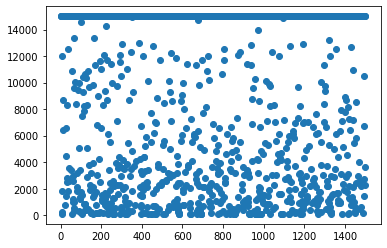

In [391]:
temp=[]
for i in paretoposition:
    temp.append(np.average(i))
plt.scatter(sno,temp)
plt.show()

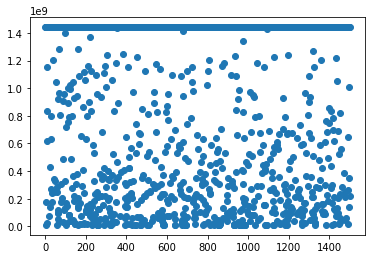

In [392]:
plt.scatter(sno,paretocost1)
plt.show()

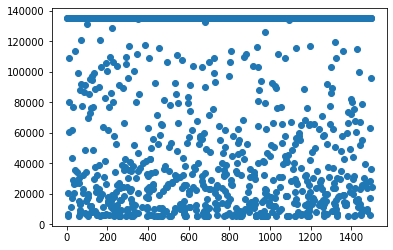

In [393]:
temp=[]
for i in paretocost2:
    temp.append(abs(i))
plt.scatter(sno,temp)
plt.show()

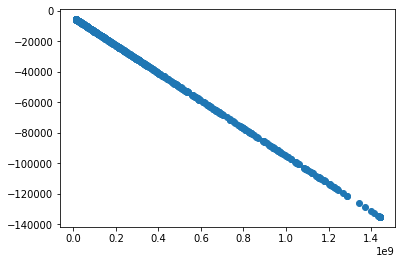

In [394]:
plt.scatter(paretocost1,paretocost2)
plt.show()

In [395]:
#print(att_lst)

In [396]:
#print(def_lst)

In [397]:
persons_df.iloc[attacker_index,0]

[2423.543762937227,
 2423.543762937227,
 2423.543762937227,
 2423.543762937227,
 1567.2782445528785]

In [398]:
#persons_df['Position'].iloc[attacker_index]=1

In [399]:
# a=[1,2,3,4,5]
# for i in range(len(a)):
#     persons_df.iloc[attacker_index,0][i]=a[i]

In [400]:
#persons_df.iloc[attacker_index,0]=persons_df.iloc[defender_index,0]

In [401]:
persons_df.iloc[attacker_index,0]

[2423.543762937227,
 2423.543762937227,
 2423.543762937227,
 2423.543762937227,
 1567.2782445528785]

In [402]:
persons_df.iloc[defender_index,0]

[15000, 15000, 15000, 15000, 3957.618880740797]

In [403]:
# persons_df.to_csv("F:\Downloads\projexport.csv")

In [404]:
# for j in range(10):
#     temp=round(random.uniform(1,4))
#     if temp==1:
#         print(temp,"one")
#     elif temp==2:
#         print(temp)
#     elif temp==3:
#         print(temp)
#     else:
#         print(temp)

In [405]:
persons_df['Position'].iloc[1][0]

2423.543762937227

In [406]:
# a=[[0, 0, 0, 0, 0, 0, 0],[1,1,1,1,1,1,1]]
# # for i in range(1):
# #     print(sum(a[:][i]))
# a[0][i]+=a[1][i]
# print(a)
# [value,index]=[max(a[0]),a[0].index(max(a[0]))]
# print(value)


In [407]:
# print(tetta*2)

In [408]:
# a=np.ones(5,dtype=np.int16)
# a[1]*a[2]


In [409]:
# a=max([2,3,4],5)
# a

In [410]:
x1=[1,2,3,4]
x2=[4,3,2,1]
random.seed(1)
a=random.random()
b=np.sin(0.9)*a
print(a,b)
y=[]
varmax=3
varmin=2
for i in x1:
    for j in x2:
        c=i*((1-b)+(i+j)/2)*b
        print(c)
        z=max(c,varmin)
        print(z)
        z=min(z,varmax)
        print(z)
        y.append(z)

0.13436424411240122 0.10525112810500004
0.357301148400125
2
2
0.304675584347625
2
2
0.25205002029512497
2
2
0.19942445624262495
2
2
0.81985342490525
2
2
0.71460229680025
2
2
0.60935116869525
2
2
0.5041000405902499
2
2
1.3876568295153748
2
2
1.229780137357875
2
2
1.071903445200375
2
2
0.914026753042875
2
2
2.0607113622305
2.0607113622305
2.0607113622305
1.8502091060205
2
2
1.6397068498105
2
2
1.4292045936005
2
2


In [411]:
print(y)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.0607113622305, 2, 2, 2]


In [412]:
max(0.357301148400125,2)

2